In [1]:
#Step1: Importing libraries and reading Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [2]:
#Step 2: COnverting catagorical data into neumerical Data
df.Gender = df['Gender'].replace(['Male', 'Female'], [0,1])
df.head()

,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801


In [3]:
df.tail()

,Gender,Height,Weight
8550,1,60.483946,110.565497
8551,1,63.423372,129.921671
8552,1,65.584057,155.942671
8553,1,67.429971,151.678405
8554,1,60.921791,131.253738


In [4]:
df.shape

(8555, 3)

In [5]:
#STEP 3: DEPENDENT Weight Y
#INDEPENDENT Gender, height X
#STEP 4: SEPARATING ATTRIBUTE AND FEATURES
X=df.drop('Weight', axis=1)#Features and should be at least 2D
Y=df['Weight']

Text(0.5, 1.0, 'Height vs Weight of the Sample')

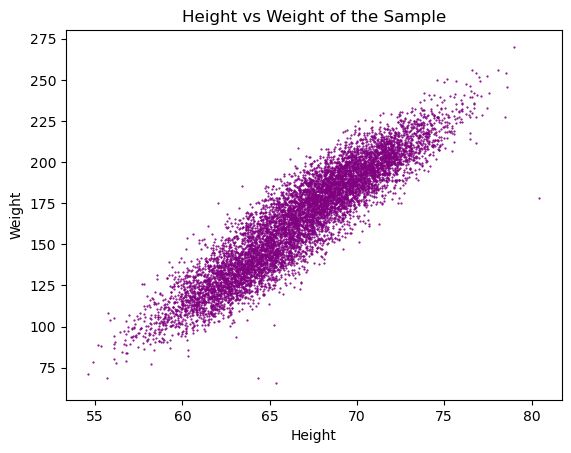

In [6]:
plt.scatter(x=X['Height'],y=Y,marker='o', s=0.3, c='purple')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight of the Sample')

# Applying Regression Model

In [7]:
#Step 5: Importing Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [8]:
X_train.head()

,Gender,Height
2055,0,70.336227
439,0,63.596455
6253,1,67.248224
4747,0,73.596533
2904,0,68.155466


In [9]:
Y_train.head()

2055    214.225886
439     144.591922
6253    172.713625
4747    229.554637
2904    179.253570
Name: Weight, dtype: float64

In [10]:
#STEP 6: LOADING REGRESSION MODEL AND RUNNING REGRESSION ON TRAINING SET. 
from sklearn.linear_model import LinearRegression

In [11]:
reg_model=LinearRegression()
reg_model.fit(X_train,Y_train)

LinearRegression()

In [12]:
reg_model.coef_

array([-19.53981382,   5.96406488])

In [13]:
reg_model.intercept_

-224.67075564236046

In [14]:
prediction=reg_model.predict(X_test)
prediction

array([171.86957724, 150.04693576, 140.60049748, ..., 133.34550587,
       171.05533543, 178.16378644])

In [15]:
Y_test

2310    170.989833
7374    154.595451
5830    147.025011
6567    125.497219
943     148.605042
           ...    
3629    188.623549
1952    195.717885
8105    127.778682
1222    160.372739
4412    196.493315
Name: Weight, Length: 2567, dtype: float64

In [38]:
#STEP 7 MSE 
from sklearn.metrics import mean_absolute_error,mean_squared_error
MSE=mean_squared_error(Y_test, prediction)
MSE

104.3282507588022

# Applying KNN Regression Model

Optimal Value for K is 57


<Axes: >

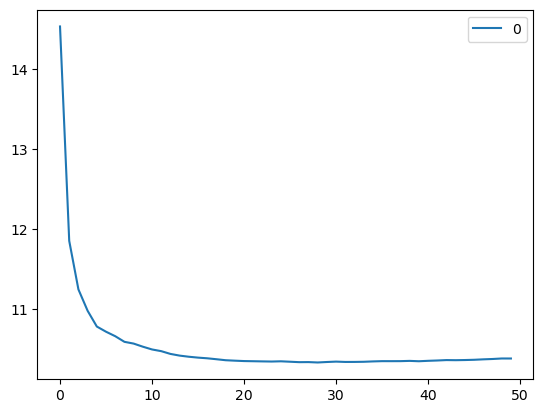

In [87]:
# Choosing The best Value of K Method 1
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

rmse_val = [] #to store rmse values for different k
comperator=float('inf')
dmy=0
for K in range(1,100,2):
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, Y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    #print('RMSE value for k= ' , K , 'is:', error)
    if error<k:
        comperator=error
        dmy=K
print(f"Optimal Value for K is {dmy}")
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [84]:
#Method 2
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[i for i in range(1,100,2)]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,Y_train)
model.best_params_

{'n_neighbors': 59}

In [93]:
from sklearn.neighbors import KNeighborsRegressor
KNNreg=KNeighborsRegressor(n_neighbors= 57)
KNNreg

KNeighborsRegressor(n_neighbors=57)

In [94]:
KNNreg.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=57)

In [95]:
KNN_reg_pred=KNNreg.predict(X_test)
KNN_reg_pred

array([173.29032458, 151.11573661, 139.37488459, ..., 132.72226199,
       169.78649732, 177.06579543])

In [96]:
Y_test

2310    170.989833
7374    154.595451
5830    147.025011
6567    125.497219
943     148.605042
           ...    
3629    188.623549
1952    195.717885
8105    127.778682
1222    160.372739
4412    196.493315
Name: Weight, Length: 2567, dtype: float64

In [97]:
# MSE 
from sklearn.metrics import mean_absolute_error,mean_squared_error
MSE=mean_squared_error(Y_test, KNN_reg_pred)
MSE

106.63375007359285

# Applying KNN Classification Model

In [17]:
#Step1: Importing libraries and reading Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [18]:
#Step 2: COnverting catagorical data into neumerical Data
df.Gender = df['Gender'].replace(['Male', 'Female'], [0,1])
df.head()

,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801


In [19]:
#STEP 3: DEPENDENT Gender y 
#INDEPENDENT Gender, height x
#STEP 4: SEPARATING ATTRIBUTE AND FEATURES
x=df.drop('Gender', axis=1)#Features and should be at least 2D
y=df['Gender']

In [20]:
x.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int64

In [22]:
#Step 5: Importing Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [111]:
#Step 6: loading KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
KNNclass = KNeighborsClassifier(n_neighbors=5)

In [112]:
KNNclass.fit(x_train,y_train)

KNeighborsClassifier()

In [117]:
#Step 7: Geting values for test data with train model
myclasspred=KNNclass.predict(x_test)
myclasspred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [114]:
y_test.head()

2310    0
7374    1
5830    1
6567    1
943     0
Name: Gender, dtype: int64

In [118]:
# Step 8: Error Measurement
from sklearn.metrics import mean_absolute_error,mean_squared_error
MSE=mean_squared_error(y_test, myclasspred)
MSE

0.0950525905726529

In [121]:
check=((KNNclass.predict(x_test)-y_test)**2)**0.5
print(check)

2310    0.0
7374    0.0
5830    0.0
6567    0.0
943     0.0
       ... 
3629    0.0
1952    0.0
8105    0.0
1222    1.0
4412    0.0
Name: Gender, Length: 2567, dtype: float64


In [120]:
# Step 9: Evaluate the model on the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, KNNclass.predict(x_test)))

0.9049474094273471
